In [45]:
# data handling
import numpy as np
import pandas as pd

# Dataset
from sklearn.datasets import fetch_openml

# Sklearn preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

# Model testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Visualising
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report
from IPython.display import Image  

In [2]:
# We fetch the dataset and split it into X and y.
# source: https://www.openml.org/search?type=data&status=active&id=554
X, y = fetch_openml(data_id=554, as_frame=False, return_X_y=True)

In [3]:
df_describe = pd.DataFrame(X)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
df_describe2 = pd.DataFrame(y)
df_describe2.describe()

,0
count,70000
unique,10
top,1
freq,7877


In [5]:
# data shape: rows and columns
print(X.shape, y.shape)

(70000, 784) (70000,)


In [6]:
# We need data to be consistent. 

# X is float. That is ok.
print( 'Example X:', X[5][240] )
print('Datatype:', X.dtype)

# y is int as a string. That is not ok.
print( 'Example y:',y[5] )
print('Datatype:', y.dtype)

Example X: 31.0
Datatype: float64
Example y: 2
Datatype: object


In [7]:
# convert y to integers
y = y.astype(int)

In [8]:
# check y again
print( 'Example y:',y[5] )
print('Datatype:', y.dtype)

Example y: 2
Datatype: int32


In [9]:
# Create a training set, test set and validation set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.50, random_state=1)
print('First model training data:', X_train.shape,  y_train.shape)
print('Second model training data:',X_val.shape, y_val.shape)
print('Test model:',X_test.shape, y_test.shape)

First model training data: (24500, 784) (24500,)
Second model training data: (24500, 784) (24500,)
Test model: (21000, 784) (21000,)


In [10]:
# check how many of each digit is in the train set
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 2467,
 1: 2744,
 2: 2409,
 3: 2464,
 4: 2388,
 5: 2142,
 6: 2454,
 7: 2555,
 8: 2394,
 9: 2483}

In [11]:
# check how many of each digit is in the validation set
unique, counts = np.unique(y_val, return_counts=True)
dict(zip(unique, counts))

{0: 2365,
 1: 2770,
 2: 2484,
 3: 2535,
 4: 2389,
 5: 2277,
 6: 2359,
 7: 2550,
 8: 2383,
 9: 2388}

In [12]:
# Checking the minimum and 
# maximum values of X: too large a range.
print(X.min())
print(X.max())

0.0
255.0


In [13]:
# Normalization: we make data fit between 0 and 1.
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [14]:
X_train[5][260]

0.33725490196078434

In [15]:
# Checking the minimum and maximum values of X
print(X_val.min())
print(X_val.max())

0.0
1.0


<AxesSubplot:ylabel='count'>

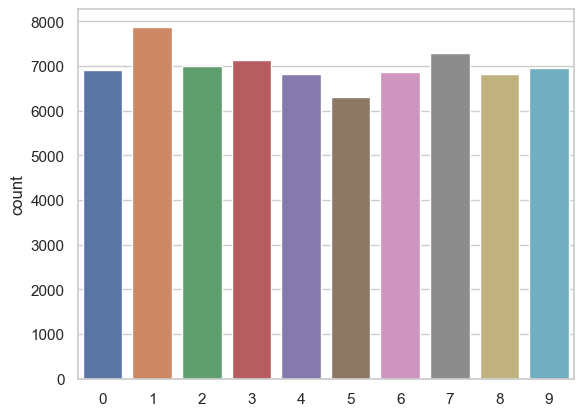

In [16]:
# How many we have of every type.
sns.set_theme(style="whitegrid")
sns.countplot(x = y)

In [17]:
# function to draw images. 
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0, num_images): 
            plt.subplot(int(num_images/10),10, digit_num + 1) #create subplots
            mat_data = X[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis

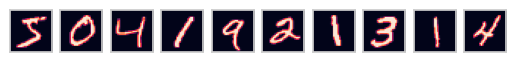

In [18]:
# Show ten images of the dataset
show_images(10)

# Random Forest

Input Shape: (24500, 784)
Accuracy: 96.000%

 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
[[2043    2    0    0    0    2   10    0   14    0]
 [   0 2323   17    5    5    4    2    3    2    2]
 [   9    3 2011    8   11    2   17   19   15    2]
 [   3    4   35 2013    0   33    4   21   16   13]
 [   5    4    5    0 1966    1    5    8    8   45]
 [   8    8    7   33    7 1795   12    0   11   13]
 [   9    4    1    0    0   14 2033    0    2    0]
 [   4    9   18    0    9    0    0 2114    2   32]
 [   5   14   16   32    9   13   12    0 1918   29]
 [  13    1    7   34   35    7    2   28   16 1944]]
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      2071
           2       0.98      0.98      0.98      2363
           3       0.95      0.96      0.95      2097
           4       0.95      0.94      0.94      2142
           5       0.96      0.96      0.

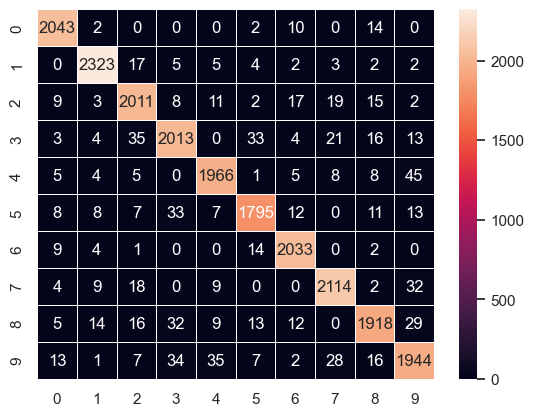

In [19]:
# do a first random forest test

def fit_random_forest_classifier(X, y, print_output = True):

    clf = RandomForestClassifier(n_estimators = 100, max_depth = None, random_state = 999)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if print_output == True:
        
        # Confusion matrix with numbers
        matrix = confusion_matrix(y_test, y_pred)
        
        # Heatmap with colors for a better overview
        sns.color_palette("magma", as_cmap = True)
        sns.heatmap(matrix, annot = True, linewidths = .5 , fmt='g')
        
        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:.3%}\n'.format(accuracy))
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        print(matrix)
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        target_names = ['1', '2', '3','4','5','6','7','8','9','0']
        print(classification_report(y_test,  y_pred, target_names = target_names))
        
    return accuracy

fit_random_forest_classifier(X, y);

# Logistic Regression

Input Shape: (24500, 784)
Accuracy: 91.257%

 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
[[2014    0    2    4    5   14   12    3   16    1]
 [   0 2297   15    3    1    9    2    4   31    1]
 [  17   23 1849   23   27   13   37   34   66    8]
 [   4   10   57 1898    3   71   10   21   44   24]
 [   4   16   15    5 1875    7   12   11   20   82]
 [  17   20   11   68   21 1625   34    7   53   38]
 [  11    5   17    4    5   32 1970    2   15    2]
 [   9   12   20    3   13    1    1 2051    5   73]
 [  19   48   16   56    8   66   22   13 1762   38]
 [  17    3   11   33   66   19    1   83   31 1823]]
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
              precision    recall  f1-score   support

           1       0.95      0.97      0.96      2071
           2       0.94      0.97      0.96      2363
           3       0.92      0.88      0.90      2097
           4       0.91      0.89      0.90      2142
           5       0.93      0.92      0.

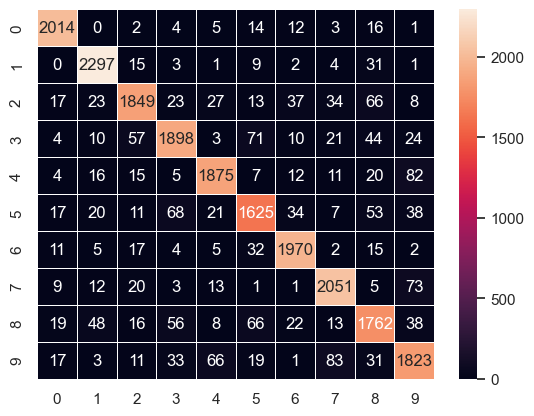

In [20]:
# do a second Multi-Variate Logistic Regression test

def fit_logistic_regression_classifier(X, y, print_output = True):

    clf = LogisticRegression(max_iter=10000, solver='liblinear', random_state=999)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if print_output == True:
        
        # Confusion matrix with numbers
        matrix = confusion_matrix(y_test, y_pred)
        
        # Heatmap with colors for a better overview
        sns.color_palette("magma", as_cmap = True)
        sns.heatmap(matrix, annot = True, linewidths = .5 , fmt='g')
        
        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:.3%}\n'.format(accuracy))
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        print(matrix)
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        target_names = ['1', '2', '3','4','5','6','7','8','9','0']
        print(classification_report(y_test,  y_pred, target_names = target_names))
    
    return accuracy

fit_logistic_regression_classifier(X, y);

# ExtraTrees Classifier

Input Shape: (24500, 784)
Accuracy: 96.390%

 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
[[2044    2    0    1    0    1    9    0   14    0]
 [   0 2325   11    5    3    5    4    2    2    6]
 [   8    3 2009    8   13    4   15   20   16    1]
 [   4    2   28 2029    0   31    1   22   17    8]
 [   3    3    5    1 1974    0    6    6   10   39]
 [   7    2    6   34    5 1804   12    1   14    9]
 [  12    4    1    0    0    8 2037    0    1    0]
 [   1    8   16    0   10    0    0 2121    4   28]
 [   7    9    8   23    9   15   13    1 1937   26]
 [  12    2    5   30   30    5    0   24   17 1962]]
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      2071
           2       0.99      0.98      0.98      2363
           3       0.96      0.96      0.96      2097
           4       0.95      0.95      0.95      2142
           5       0.97      0.96      0.

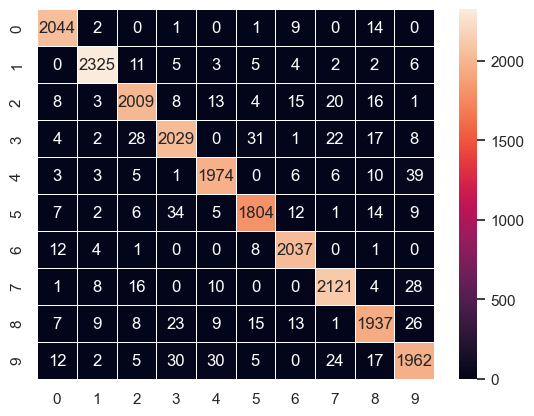

In [21]:
# do a third ExtraTrees Classifier test

def fit_extra_tree_classifier(X, y, print_output = True):

    clf = ExtraTreesClassifier(n_estimators=100, random_state=999)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if print_output == True:
        
        # Confusion matrix with numbers
        matrix = confusion_matrix(y_test, y_pred)
        
        # Heatmap with colors for a better overview
        sns.color_palette("magma", as_cmap = True)
        sns.heatmap(matrix, annot = True, linewidths = .5 , fmt='g')
        
        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:.3%}\n'.format(accuracy))
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        print(matrix)
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        target_names = ['1', '2', '3','4','5','6','7','8','9','0']
        print(classification_report(y_test,  y_pred, target_names = target_names))
    
    return accuracy

fit_extra_tree_classifier(X, y);

# Gridsearch

In [27]:
# three models

log = LogisticRegression(n_jobs=-1, max_iter=10000, warm_start=True, random_state=999)

rf = RandomForestClassifier(n_jobs=-1, max_features="auto", warm_start=True, random_state=999)

ex = ExtraTreesClassifier(n_jobs=-1, max_features="auto", warm_start=True, random_state=999)

In [28]:
# combine models
ensemble_clf=[log, ex, rf]  

In [29]:
# parameters

params_log = {
    "penalty" : ["l2"], # l1 lasso l2 ridge
    "C" : [1.0, 1.1, 1.2, 1.3, 1.4, 1.5], 
    "solver" :['saga'],   # liblinear before
}

params_rf = {
    "criterion": ["entropy"], 
    "max_depth": range(9, 12, 1), # none before
    "min_samples_leaf": range(1, 3, 1), 
    "n_estimators": range(650, 710, 10)} # 100 before

params_ex = {
    "n_estimators": [250, 300, 350, 400, 450 ], # 100 before
    "max_depth": [10, 11, 12, 13, 14, 15,16, 17, 18, 19, 20, 21, 22,23, 24, 25]     
}

In [30]:
# combines parameters
parameters_list=[params_log, params_ex, params_rf]  

In [31]:
# how to split data
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=999)

''' 

# loop over three models
for i in range(len(ensemble_clf)):
    
    print('Now starting: ', ensemble_clf[i]) 
        
    Grid = GridSearchCV(
        estimator = ensemble_clf[i], 
        param_grid = parameters_list[i], 
        n_jobs = -1, 
        cv = cv, 
        verbose = 3
    ).fit(X_train[:1000], y_train[:1000])
    
    print('Best index:',  Grid.best_index_)
    print('Best score:',  Grid.best_score_)
    print('Best params:', Grid.best_params_)
    
'''

" \n\n# loop over three models\nfor i in range(len(ensemble_clf)):\n    \n    print('Now starting: ', ensemble_clf[i]) \n        \n    Grid = GridSearchCV(\n        estimator = ensemble_clf[i], \n        param_grid = parameters_list[i], \n        n_jobs = -1, \n        cv = cv, \n        verbose = 3\n    ).fit(X_train[:1000], y_train[:1000])\n    \n    print('Best index:',  Grid.best_index_)\n    print('Best score:',  Grid.best_score_)\n    print('Best params:', Grid.best_params_)\n    \n"

How I tested this:
    
Run with 1000 samples

First:
---------

    ExtraTreesClassifier
    --------------------
    Run 1: 
    
        Best score: 0.8970077862293432
        Best params: {'max_depth': 25, 'n_estimators': 200}
    Run 2: 
        Best score: 0.9110008211804619
        Best params: {'max_depth': 15, 'n_estimators': 300}
    Run 3:
        Best score: 0.9110008211804619
        Best params: {'max_depth': 15, 'n_estimators': 300}


**ExtraTreesClassifier = {'max_depth': 15, 'n_estimators': 300}**


Second:
---------


    RandomForestClassifier
    --------------------
    Run 1: 
        Best score: 0.9050098002193812
        Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 700}
    Run 2:
        Best score: 0.9050098002193812
        Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 700}
    Run 3:
        Best score: 0.9060108012203821
        Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 690}
    Run4: 
        Best score: 0.9060108012203821
        Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 690}
        
**RandomForestClassifier = {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 690}**


Third:
---------


    LogisticRegression
    --------------------
    Run 1: 
        Best score: 0.8670167173161185
        Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
    Run 2:
        Best score: 0.8539947132761504
        Best params: {'C': 100.0, 'penalty': 'l2', 'solver': 'saga'}
    Run 3:
        Best score: 0.8539947132761504
        Best params: {'C': 90.0, 'penalty': 'l2', 'solver': 'saga'}
    Run 4: 
        Best score: 0.8539947132761504
        Best params: {'C': 60.0, 'penalty': 'l2', 'solver': 'saga'}
    Run 4:
        Best score: 0.8670167173161185
        Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
    Run 5:
        Best score: 0.8670167173161185
        Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
    

Input Shape: (24500, 784)
Accuracy: 94.814%

 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
[[2029    1    3    1    0    2   13    1   21    0]
 [   0 2312   21    6    3    7    4    3    6    1]
 [  12    6 1973    8   18    7   25   32   15    1]
 [   5   10   36 1976    0   49    6   23   22   15]
 [   5    4    4    0 1910    1    8    9   12   94]
 [   9   19    6   36    6 1785   10    2   13    8]
 [  15    8    1    0    3   13 2021    0    2    0]
 [   1   14   26    0   10    0    0 2090    2   45]
 [   5   19   13   29    7   14   14    2 1911   34]
 [  12    8   12   34   41    9    1   44   22 1904]]
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
              precision    recall  f1-score   support

           1       0.97      0.98      0.97      2071
           2       0.96      0.98      0.97      2363
           3       0.94      0.94      0.94      2097
           4       0.95      0.92      0.93      2142
           5       0.96      0.93      0.

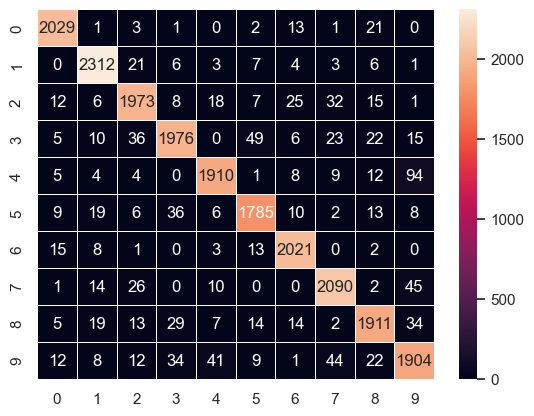

In [32]:
# The final Random forest
# With the Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 690}
# with the validation test set

def fit_random_forest_classifier(X, y, print_output = True):

    clf = RandomForestClassifier(n_estimators = 690, max_depth = 10, random_state = 999, criterion= 'entropy' , min_samples_leaf = 1, )

    clf.fit(X_val, y_val)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if print_output == True:
        
        # Confusion matrix with numbers
        matrix = confusion_matrix(y_test, y_pred)
        
        # Heatmap with colors for a better overview
        sns.color_palette("magma", as_cmap = True)
        sns.heatmap(matrix, annot = True, linewidths = .5 , fmt='g')
        
        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:.3%}\n'.format(accuracy))
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        print(matrix)
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        target_names = ['1', '2', '3','4','5','6','7','8','9','0']
        print(classification_report(y_test,  y_pred, target_names = target_names))
        
    return accuracy

fit_random_forest_classifier(X, y);

Input Shape: (24500, 784)
Accuracy: 91.410%

 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
[[1993    0    7    6    9   21   12    5   17    1]
 [   0 2294   13    6    0    6    3    9   30    2]
 [  13   27 1871   31   20   15   34   29   47   10]
 [  11    9   42 1909    3   78    6   24   31   29]
 [   7   11   17    4 1890    6   12   10   11   79]
 [  22   17   16   73   16 1627   36    7   56   24]
 [  16    8   32    3   19   23 1953    1    5    3]
 [   5   11   25   13   18    4    0 2048    4   60]
 [  12   42   24   73   10   54   15    6 1776   36]
 [  16   13    7   32   66   15    1   83   19 1835]]
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
              precision    recall  f1-score   support

           1       0.95      0.96      0.96      2071
           2       0.94      0.97      0.96      2363
           3       0.91      0.89      0.90      2097
           4       0.89      0.89      0.89      2142
           5       0.92      0.92      0.

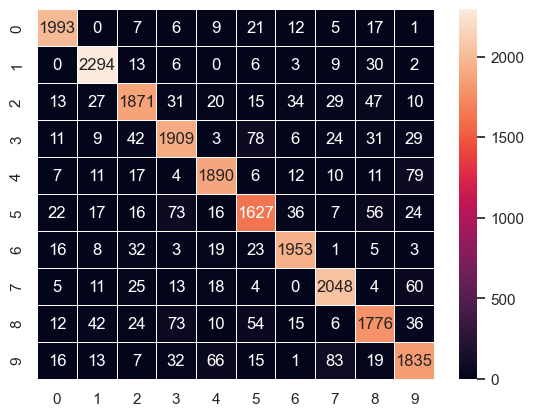

In [33]:
# The final Multi-Variate Logistic Regression test
# With the Best params: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
# with the validation test set

def fit_logistic_regression_classifier(X, y, print_output = True):

    clf = LogisticRegression(max_iter=10000, C= 1.0, penalty= 'l2', solver= 'saga' , random_state=999)

    clf.fit(X_val, y_val)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if print_output == True:
        
        # Confusion matrix with numbers
        matrix = confusion_matrix(y_test, y_pred)
        
        # Heatmap with colors for a better overview
        sns.color_palette("magma", as_cmap = True)
        sns.heatmap(matrix, annot = True, linewidths = .5 , fmt='g')
        
        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:.3%}\n'.format(accuracy))
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        print(matrix)
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        target_names = ['1', '2', '3','4','5','6','7','8','9','0']
        print(classification_report(y_test,  y_pred, target_names = target_names))
    
    return accuracy

fit_logistic_regression_classifier(X, y);

Input Shape: (24500, 784)
Accuracy: 96.076%

 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
[[2043    1    3    0    0    1    9    0   14    0]
 [   0 2324   17    5    1    5    2    4    5    0]
 [  10    3 1998    9   14    5   19   26   13    0]
 [   1    3   24 2028    0   37    2   18   16   13]
 [   4    8    6    1 1964    0    6    9    5   44]
 [  10   10    6   30    4 1810    9    0    8    7]
 [  13    5    0    0    3    8 2034    0    0    0]
 [   6   13   16    0   10    0    0 2108    4   31]
 [   5   14    8   29    9   17   11    1 1930   24]
 [  13    4   11   28   29    8    1   40   16 1937]]
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      2071
           2       0.97      0.98      0.98      2363
           3       0.96      0.95      0.95      2097
           4       0.95      0.95      0.95      2142
           5       0.97      0.96      0.

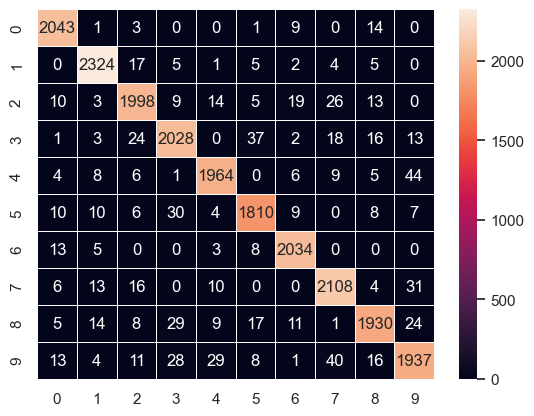

In [34]:
# The final ExtraTrees Classifier test
# With the Best params: {'max_depth': 15, 'n_estimators': 300}
# with the validation test set

def fit_extra_tree_classifier(X, y, print_output = True):

    clf = ExtraTreesClassifier(n_estimators=300, max_depth = 15,  random_state=999) 

    clf.fit(X_val, y_val)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if print_output == True:
        
        # Confusion matrix with numbers
        matrix = confusion_matrix(y_test, y_pred)
        
        # Heatmap with colors for a better overview
        sns.color_palette("magma", as_cmap = True)
        sns.heatmap(matrix, annot = True, linewidths = .5 , fmt='g')
        
        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:.3%}\n'.format(accuracy))
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        print(matrix)
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        target_names = ['1', '2', '3','4','5','6','7','8','9','0']
        print(classification_report(y_test,  y_pred, target_names = target_names))
    
    return accuracy

fit_extra_tree_classifier(X, y);

In [35]:
# re-combine 
X_train = np.concatenate((X_train, X_val ), axis=0)
y_train = np.concatenate((y_train, y_val ), axis=0)

X_train.shape, y_train.shape 

((49000, 784), (49000,))

Input Shape: (49000, 784)
Accuracy: 96.500%

 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
[[2047    2    3    0    0    1    8    0   10    0]
 [   0 2330   13    5    3    3    4    3    2    0]
 [  10    2 2007    6   14    3   17   21   15    2]
 [   2    4   26 2038    0   28    2   17   14   11]
 [   4    5    3    0 1968    0    4    8    7   48]
 [   6   10    9   28    3 1811   10    1   10    6]
 [   8    4    0    0    2    8 2041    0    0    0]
 [   3   15   14    0    5    0    0 2119    2   30]
 [   4   13    6   17    7   14    9    1 1953   24]
 [  13    2    7   31   30    5    0   32   16 1951]]
 -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      2071
           2       0.98      0.99      0.98      2363
           3       0.96      0.96      0.96      2097
           4       0.96      0.95      0.96      2142
           5       0.97      0.96      0.

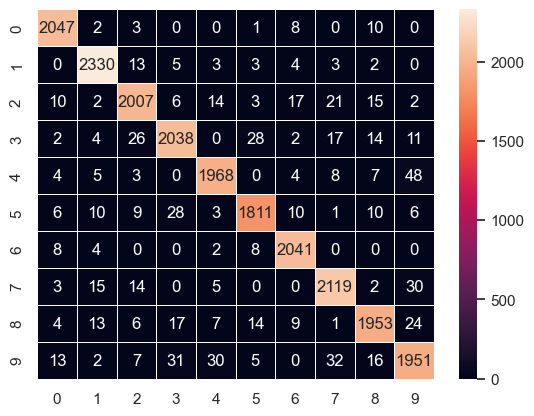

In [36]:
# Curious extra test :)  ExtraTrees Classifier test
# With the Best params: {'max_depth': 15, 'n_estimators': 300}
# with the validation test set

def fit_extra_tree_classifier(X, y, print_output = True):

    clf = ExtraTreesClassifier(n_estimators=300, max_depth = 15,  random_state=999) 

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    if print_output == True:
        
        # Confusion matrix with numbers
        matrix = confusion_matrix(y_test, y_pred)
        
        # Heatmap with colors for a better overview
        sns.color_palette("magma", as_cmap = True)
        sns.heatmap(matrix, annot = True, linewidths = .5 , fmt='g')
        
        print('Input Shape: {}'.format(X_train.shape))
        print('Accuracy: {:.3%}\n'.format(accuracy))
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        print(matrix)
        print(' -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')
        target_names = ['1', '2', '3','4','5','6','7','8','9','0']
        print(classification_report(y_test,  y_pred, target_names = target_names))
    
    return accuracy

fit_extra_tree_classifier(X, y);

# Analysing the model

In [37]:
best_model = ExtraTreesClassifier(n_estimators=300, max_depth = 15,  random_state=999) 
best_model.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=15, n_estimators=300, random_state=999)

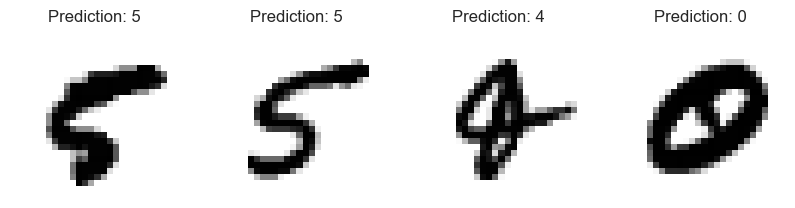

In [41]:
# Predict the value of the digit on the test subset
predicted = best_model.predict(X_test)

#plot it
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [42]:
print(
    f"Classification report for classifier {best_model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier ExtraTreesClassifier(max_depth=15, n_estimators=300, random_state=999):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2071
           1       0.98      0.99      0.98      2363
           2       0.96      0.96      0.96      2097
           3       0.96      0.95      0.96      2142
           4       0.97      0.96      0.96      2047
           5       0.97      0.96      0.96      1894
           6       0.97      0.99      0.98      2063
           7       0.96      0.97      0.97      2188
           8       0.96      0.95      0.96      2048
           9       0.94      0.93      0.94      2087

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000




Confusion matrix:
[[2047    2    3    0    0    1    8    0   10    0]
 [   0 2330   13    5    3    3    4    3    2    0]
 [  10    2 2007    6   14    3   17   21   15    2]
 [   2    4   26 2038    0   28    2   17   14   11]
 [   4    5    3    0 1968    0    4    8    7   48]
 [   6   10    9   28    3 1811   10    1   10    6]
 [   8    4    0    0    2    8 2041    0    0    0]
 [   3   15   14    0    5    0    0 2119    2   30]
 [   4   13    6   17    7   14    9    1 1953   24]
 [  13    2    7   31   30    5    0   32   16 1951]]


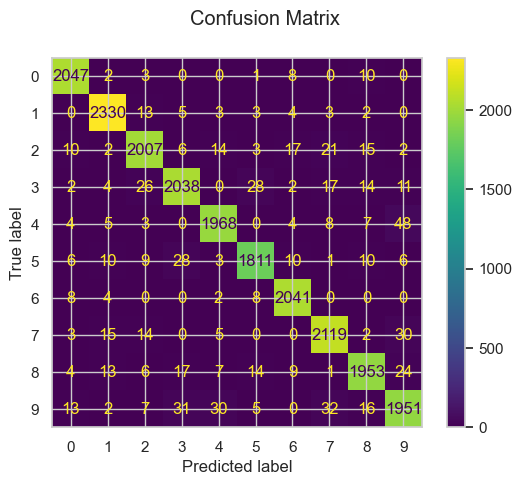

In [43]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [44]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2071
           1       0.98      0.99      0.98      2363
           2       0.96      0.96      0.96      2097
           3       0.96      0.95      0.96      2142
           4       0.97      0.96      0.96      2047
           5       0.97      0.96      0.96      1894
           6       0.97      0.99      0.98      2063
           7       0.96      0.97      0.97      2188
           8       0.96      0.95      0.96      2048
           9       0.94      0.93      0.94      2087

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000


